# Диагностика стагнации выручки мобильного приложения
**Автор: Черных В.Т.**


**📱 Рассматриваемый объект:** 

Мобильное приложение, предоставляющее пользователям доступ к разнообразному развлекательному контенту (видео, подкасты, блоги) через систему платных подписок.

**💼 Бизнес-контекст:**

В начале лета в приложение был добавлен новый спортивный контент с целью расширения аудитории за счет пользователей, интересующихся спортом и здоровым образом жизни. Параллельно с этим была скорректирована маркетинговая стратегия привлечения пользователей.

**⚠️ Проблема:**

Несмотря на рост интереса к продукту после запуска новой фичи, выручка приложения начала демонстрировать стагнацию.

**🎯 Цель исследования:**

Комплексный анализ эффективности измененной маркетинговой стратегии и юнит-экономики продукта для выявления причин стагнации выручки и разработки рекомендаций по оптимизации маркетинговых расходов.

**📋 Задачи анализа:**

1. *Оценить общую эффективность продукта:*
    - Проанализировать динамику ключевых метрик за первые 28 дней жизни пользователей.
    - Рассчитать основные показатели юнит-экономики (CAC, LTV, ROI).
    

2. *Выявить проблемные зоны:*
    - Определить источники привлечения, не достигающие окупаемости.
    - Проанализировать влияние нового контента на финансовые показатели.
    - Идентифицировать факторы, способствующие стагнации выручки.


3. *Разработать рекомендации:*
    - Сформулировать предложения по оптимизации маркетингового бюджета.
    - Определить перспективные направления для дальнейшего развития продукта.

**🔬 Этапы исследования:**

1. Предобработка и первичный анализ исходных данных.
2. Подготовка данных к когортному анализу.
3. Анализ общей динамики продукта:
    - Исследование ключевых метрик вовлеченности: DAU, MAU, Stickiness Ratio.
    - Рассчет основных метрик юнит-экономики: LTV, CAC, ROI.
4. Сравнительный анализ эффективности каналов привлечения.
    - Анализ поведения пользователей, пришедших через разные каналы.
    - Расчет основных метрик юнит-экономики в разрезе источников привлечения.
5. Анализ долгосрочной окупаемости проблемных каналов.
6. Формулировка выводов и рекомендаций.

**🗂️ Описание исходных данных**

Для проведения анализа в нашем распоряжении находятся три таблицы, содержащие информацию о поведении пользователей, финансовых операциях и маркетинговых затратах. Данные охватывают период с 1 апреля по 30 ноября 2024 года.

Ниже приведена детализация по каждому из датасетов.

1. Датасет **`ppro_visits.csv`** — информация о посещениях приложения пользователями:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна регистрации пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор канала привлечения;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.


2. Датасет **`ppro_orders.csv`** — информация о покупках подписки:
    - `user_id` — уникальный идентификатор пользователя, совершившего покупку;
    - `event_dt` — дата и время совершения покупки;
    - `revenue` — выручка с покупки.


3. Датасет **`ppro_costs.csv`** — информация о маркетинговых расходах:
    - `dt` — дата осуществления расходов;
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.

### Загрузка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Убираем лишние предупреждения для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем данные
ppro_visits = pd.read_csv('https://raw.githubusercontent.com/vladioken/Diagnosis-of-mobile-app-revenue-stagnation/refs/heads/main/ppro_visits.csv', parse_dates=['session_start','session_end'])
ppro_orders = pd.read_csv('https://raw.githubusercontent.com/vladioken/Diagnosis-of-mobile-app-revenue-stagnation/refs/heads/main/ppro_orders.csv', parse_dates=['event_dt'])
ppro_costs = pd.read_csv('https://raw.githubusercontent.com/vladioken/Diagnosis-of-mobile-app-revenue-stagnation/refs/heads/main/ppro_costs.csv', parse_dates=['dt'])

## Предварительный анализ исходных данных
### Предобработка датасета `ppro_visits`

In [3]:
# Выведем несколько строк датасета
ppro_visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [4]:
# Выведем информацию для оценки пропусков, типов и количества строк
ppro_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


In [5]:
# Смотрим количество уникальных пользователей
ppro_visits['user_id'].nunique()

74856

In [6]:
# Смотрим уникальные значения категориальных столбцов
for col in ['region', 'device', 'channel']:
    print(f'Уникальные значения столбца {col}: {ppro_visits[col].unique()}')    

Уникальные значения столбца region: ['India']
Уникальные значения столбца device: ['desktop' 'tv' 'mobile']
Уникальные значения столбца channel: ['MediaTornado' 'RocketSuperAds' 'FaceBoom' 'TipTop']


In [7]:
# Смотрим наличие дублирующихся строк
ppro_visits[ppro_visits.duplicated(keep=False)]

,user_id,region,device,channel,session_start,session_end


In [8]:
# Меняем тип данных на datetime
ppro_visits['session_start']=pd.to_datetime(pd.to_datetime(ppro_visits['session_start']).dt.date)
ppro_visits['session_end']=pd.to_datetime(pd.to_datetime(ppro_visits['session_end']).dt.date)

# Проверяем результат преобразования типа данных
ppro_visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [9]:
# Посмотрим на минимальную и максимальную дату
print(f'''Для столбца "session_start":
минимальная дата: {ppro_visits['session_start'].dt.date.min()},
максимальная дата: {ppro_visits['session_start'].dt.date.max()}''')
print()
print(f'''Для столбца "session_end":
минимальная дата: {ppro_visits['session_end'].dt.date.min()},
максимальная дата: {ppro_visits['session_end'].dt.date.max()}''')

Для столбца "session_start":
минимальная дата: 2024-04-01,
максимальная дата: 2024-11-30

Для столбца "session_end":
минимальная дата: 2024-04-01,
максимальная дата: 2024-12-01


### Предобработка датасета `ppro_orders`

In [10]:
# Выведем несколько строк датасета
ppro_orders.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [11]:
# Выведем информацию для оценки пропусков, типов и количества строк
ppro_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


In [12]:
# Посчитаем количество уникальных платящих пользователей
ppro_orders['user_id'].nunique()

6889

In [13]:
# Посмотрим распределение выручки
ppro_orders['revenue'].value_counts().sort_index()

2.99     28674
4.49      4528
7.99       347
14.99      171
29.99      173
Name: revenue, dtype: int64

In [14]:
# Смотрим наличие дублирующихся строк
ppro_orders[ppro_orders.duplicated(keep=False)]

,user_id,event_dt,revenue


In [15]:
# Меняем тип данных на datetime
ppro_orders['event_dt']=pd.to_datetime(pd.to_datetime(ppro_orders['event_dt']).dt.date)
# Проверяем результат преобразования типа данных
ppro_orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [16]:
# Посмотрим на минимальную и максимальную дату
print(f'''Для столбца "event_dt":
минимальная дата: {ppro_orders['event_dt'].dt.date.min()},
максимальная дата: {ppro_orders['event_dt'].dt.date.max()}''')

Для столбца "event_dt":
минимальная дата: 2024-04-01,
максимальная дата: 2024-11-30


### Предобработка датасета `ppro_costs`

In [17]:
# Выведем несколько строк датасета
ppro_costs.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [18]:
# Выведем информацию для оценки пропусков, типов и количества строк
ppro_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


In [19]:
# Смотрим количество уникальных значений рекламных источников
ppro_costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

In [20]:
# Смотрим, как распределены затраты на рекламный источник 
ppro_costs['costs'].describe(percentiles=[0.95, 0.99])

count    976.000000
mean      81.691910
std       70.237689
min        9.048984
50%       54.282076
95%      216.814921
99%      286.022946
max      316.923419
Name: costs, dtype: float64

In [21]:
# Смотрим наличие дублирующихся строк
ppro_costs[ppro_costs.duplicated(keep=False)]

,dt,channel,costs


In [22]:
# Меняем тип данных на datetime
ppro_costs['dt']=pd.to_datetime(ppro_costs['dt'])

# Проверяем результат преобразования типа данных
ppro_costs.dtypes

dt         datetime64[ns]
channel            object
costs             float64
dtype: object

In [23]:
# Посмотрим на минимальную и максимальную дату
print(f'''Для столбца "dt":
минимальная дата: {ppro_costs['dt'].dt.date.min()},
максимальная дата: {ppro_costs['dt'].dt.date.max()}''')

Для столбца "dt":
минимальная дата: 2024-04-01,
максимальная дата: 2024-11-30


### 📌 Промежуточные выводы

- **Высокое качество данных**: Во всех трех датасетах отсутствуют пропуски и дубликаты, что обеспечивает надежность последующего анализа.
- **Корректные типы данных**: Все временные метки успешно преобразованы в формат datetime, что позволяет проводить временные анализы и когортный анализ. Даты соответствуют рассматриваемому диапазону (1 апреля по 30 ноября 2024 года).
- **Согласованность данных**: Названия рекламных источников полностью совпадают между датасетами `ppro_visits` и `ppro_costs`.
- **Единый рынок**: Все 74 856 пользователей сосредоточены в Индии, что позволяет сфокусировать анализ на одном регионе и исключить влияние географических факторов на метрики.

## Подготовка данных к когортному анализу

In [24]:
# считаем первый источник привлечения и дату привлечения пользователя
profiles=ppro_visits.sort_values(by='session_start').groupby('user_id').agg(
    first_dt=('session_start','min'),
    first_channel=('channel', 'first')
        ).reset_index()

# Проверяем результат
profiles.head()

,user_id,first_dt,first_channel
0,26034876,2024-05-29,FaceBoom
1,69890364,2024-06-28,RocketSuperAds
2,75610104,2024-06-09,FaceBoom
3,76692397,2024-10-21,FaceBoom
4,80224421,2024-06-21,FaceBoom


In [25]:
# Считаем количество пользователей по каждому каналу и дате привлечения
user_by_channel_counts=profiles.groupby(['first_dt', 'first_channel'])['user_id'].nunique().reset_index(name='user_counts')

# Присоединяем таблицы user_by_channel_counts и ppro_costs для дальнейшего расчета САС
ppro_costs=ppro_costs.merge(user_by_channel_counts, how='left', left_on=['dt', 'channel'], right_on=['first_dt', 'first_channel'])

# Считаем САС
ppro_costs['CAC']=ppro_costs['costs'] / ppro_costs['user_counts']

# Добавляем столбец CAC к датасету profiles
profiles=profiles.merge(ppro_costs[['first_dt','first_channel','CAC']], how='left', on=['first_dt','first_channel'])

# Выводим результат
profiles.head()

,user_id,first_dt,first_channel,CAC
0,26034876,2024-05-29,FaceBoom,0.953250
1,69890364,2024-06-28,RocketSuperAds,0.604917
2,75610104,2024-06-09,FaceBoom,1.196159
3,76692397,2024-10-21,FaceBoom,1.147967
4,80224421,2024-06-21,FaceBoom,1.208981


In [26]:
# Соединим датасеты ppro_visits и profiles в новый датасет df_visits
df_visits=ppro_visits.merge(profiles[['user_id','first_dt','first_channel']], how='left', on='user_id')

# вычисляем лайфтайм события
df_visits['lifetime_session']=(df_visits['session_start']-df_visits['first_dt']).dt.days

# посмотрим результат
df_visits.head(5)

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,lifetime_session
0,631105188566,India,desktop,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0
1,892885906464,India,tv,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0
2,517003690029,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0
3,185156659289,India,mobile,MediaTornado,2024-04-01,2024-04-01,2024-04-01,MediaTornado,0
4,409503040345,India,mobile,RocketSuperAds,2024-04-01,2024-04-01,2024-04-01,RocketSuperAds,0


In [27]:
# Аналогично для датасета ppro_orders
# Соединим датасеты ppro_orders и profiles в новый датасет df_orders
df_orders=ppro_orders.merge(profiles[['user_id','first_dt','first_channel']], how='left', on='user_id')

# вычисляем лайфтайм покупки
df_orders['lifetime_purchase']=(df_orders['event_dt']-df_orders['first_dt']).dt.days

# посмотрим результат
df_orders.head(5)

,user_id,event_dt,revenue,first_dt,first_channel,lifetime_purchase
0,771951256319,2024-04-01,2.99,2024-04-01,FaceBoom,0
1,829942381059,2024-04-01,2.99,2024-04-01,FaceBoom,0
2,727879856738,2024-04-01,14.99,2024-04-01,FaceBoom,0
3,481270888930,2024-04-01,2.99,2024-04-01,TipTop,0
4,844695029762,2024-04-01,2.99,2024-04-01,FaceBoom,0


### 📌 Промежуточные выводы по подготовке данных

В рамках подготовки к когортному анализу были сформированы три ключевых датасета, которые позволят изучать окупаемость привлечения пользователей за первые 28 дней:

**1. Датасет `profiles` - несет информацию о каналах привлечения пользователей и затрат на их привлечение:**
- `user_id` - уникальный идентификатор пользователя;
- `first_dt` - дата привлечения пользователя;
- `first_channel` - первоначальный канал привлечения пользователя;
- `CAC` - стоимость привлечения пользователя.

**2. Датасет `df_visits` - несет расширенную информацию о взаимодействии пользователя с продуктом:**
- Все исходные поля из `ppro_visits` о сессиях пользователей;
- `first_channel` - первоначальный канал привлечения пользователя;
- `first_dt` - дата привлечения пользователя;
- `lifetime_session` - количество дней от даты привлечения пользователя до даты его текущей сессии.

**3. Датасет `df_orders` - несет расширенную информацию о покупках:**
- Все исходные поля из `ppro_orders` о покупках;
- `first_channel` - первоначальный канал привлечения пользователя;
- `first_dt` - дата привлечения пользователя;
- `lifetime_purchase` - количество дней от даты привлечения пользователя до совершения им платежа.

## Анализ месячной динамики основных метрик продукта

В данном разделе рассмотрим общую динамику изменения метрик, связанной с запуском нового спортивного контента в начале лета. Это позволит ответить на следующие вопросы:
- Как повлияло обновление контента на вовлеченность пользователей?
- Изменилась ли экономическая эффективность привлечения после корректировки маркетинговой стратегии?
- Наблюдается ли ожидаемый рост метрик после добавления спортивного контента?

Результаты этого анализа станут основой для выявления причин стагнации выручки и разработки рекомендаций по оптимизации бизнес-процессов.

### Изучение пользовательской активности

Проанализируем динамику вовлеченности пользователей через основные метрики:
- **DAU (Daily Active Users)** - ежедневная активная аудитория приложения;
- **MAU (Monthly Active Users)** - месячная активная аудитория приложения;
- **Stickiness Ratio** - показатель "липкости" продукта, отражающий насколько регулярно пользователи возвращаются в приложение.

Указанные метрики рассчитываются по пользователям, которые взаимодействовали с приложением.

In [28]:
# Считаем DAU (кол-во активных пользователей по дням)
dau=df_visits.groupby('session_start')['user_id'].nunique().reset_index(name='DAU')

# Считаем среднемесячный DAU (среднее ежедневное кол-во активных пользователей в разрезе месяца)
# Для этого выделяем из каждой даты месяц
dau['month']=dau['session_start'].dt.to_period('M').dt.to_timestamp()
# Считаем среднемесячный DAU
dau_avg=dau.groupby('month')['DAU'].mean().reset_index(name='DAU_avg')

# Считаем MAU (количество активных пользователей в месяц)
# Для этого выделяем из каждой даты месяц
df_visits['month']=df_visits['session_start'].dt.to_period('M').dt.to_timestamp()
# Считаем MAU
mau=df_visits.groupby('month')['user_id'].nunique().reset_index(name='MAU')

# Переходим к расчету "липкости" Для этого объединяем два датасета
stickiness=dau_avg.merge(mau, how='left', on='month')
#Считаем коэффициент "липкости"
stickiness['stickiness']=stickiness['DAU_avg'] / stickiness['MAU']*100

# Выводим результат MAU и stickiness по месяцам
stickiness

,month,DAU_avg,MAU,stickiness
0,2024-04-01,488.333333,9069,5.384644
1,2024-05-01,576.967742,10849,5.318165
2,2024-06-01,580.366667,10240,5.667643
3,2024-07-01,615.000000,10864,5.660898
4,2024-08-01,681.193548,11977,5.687514
5,2024-09-01,724.100000,12089,5.989743
6,2024-10-01,773.193548,13036,5.931218
7,2024-11-01,868.133333,14097,6.158284


Далее, визуализируем DAU, MAU и Stickiness Ratio.

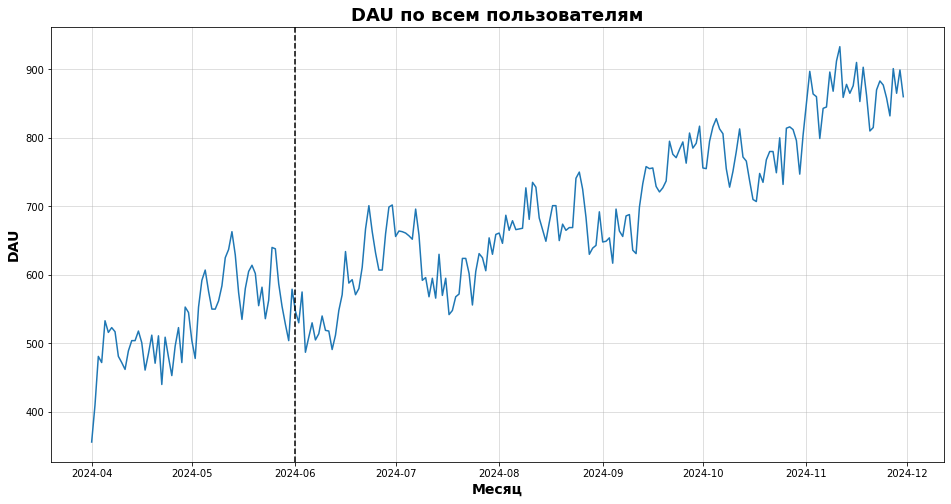

In [29]:
# Задаем размер графика
plt.figure(figsize=(16,8))

# Строим график для DAU
plt.plot(dau['session_start'], dau['DAU'])
# Выделяем на графике начало летнего периода, когда ввели новый контент
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('DAU по всем пользователям', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('DAU', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.show()

**Рост Daily Active Users (DAU)**:
- Наблюдается стабильный рост дневной активной аудитории на протяжении всего периода;
- К концу анализируемого периода количество ежедневных активных пользователей увеличилось практически в 2 раза по сравнению с начальным показателем;
- Зафиксирована выраженная недельная цикличность активности, что характерно для развлекательных приложений.

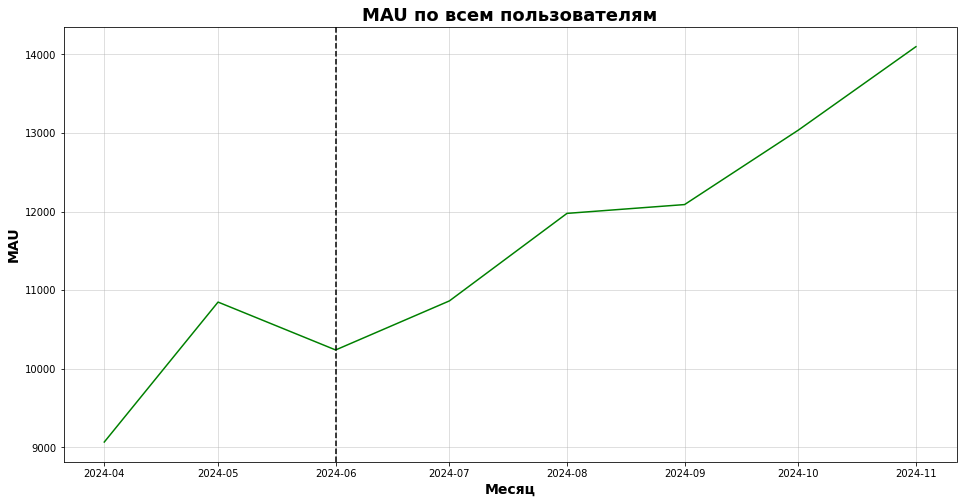

In [30]:
# Задаем размер графика
plt.figure(figsize=(16,8))

# Строим график для MAU
plt.plot(stickiness['month'], stickiness['MAU'], color='green')
# Выделяем на графике начало летнего периода, когда ввели новый контент
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('MAU по всем пользователям', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('MAU', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.show()

**Динамика Monthly Active Users (MAU)**
- Месячная аудитория демонстрирует положительную динамику с увеличением в 1,5 раза к концу периода;
- Обнаружено временное снижение MAU в июне на 5,6% по сравнению с маем, что может быть связано с сезонными факторами;
- После июньского спада отмечается устойчивый рост MAU, что свидетельствует о возможном интересе аудитории к нововведенному контенту.

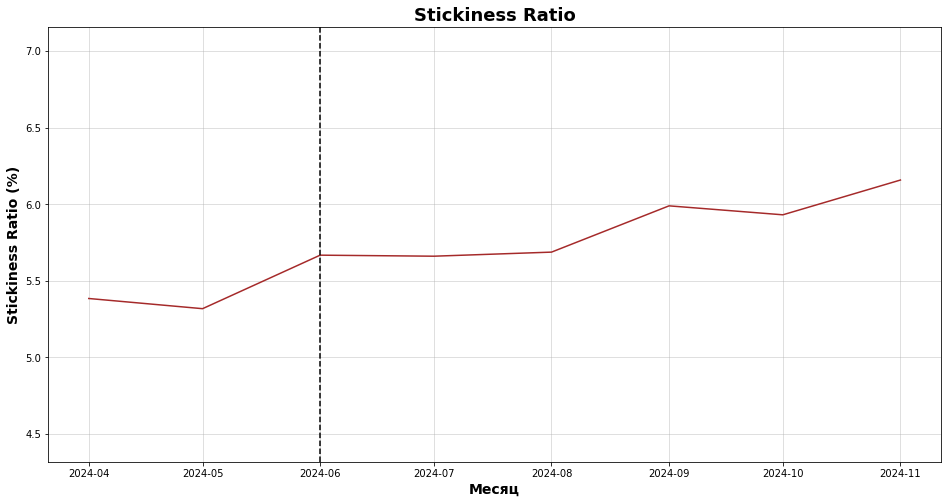

In [31]:
# Задаем размер графика
plt.figure(figsize=(16,8))

# Строим график для Stickiness Ratio
plt.plot(stickiness['month'], stickiness['stickiness'], color='brown')
# Выделяем на графике начало летнего периода, когда ввели новый контент
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Stickiness Ratio', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Stickiness Ratio (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylim(stickiness['stickiness'].min()-1, stickiness['stickiness'].max()+1)
plt.grid(alpha=0.5)
plt.show()

**Динамика Stickiness Ratio**:
- Коэффициент Stickiness Ratio продукта показал положительную динамику: рост с 5,3% до 6,2% за весь период. Однако в летние месяцы наблюдалась стагнация показателя на уровне 5,7%, что может указывать на необходимость оптимизации пользовательского опыта в этот период;
- Общий рост Stickiness Ratio подтверждает улучшение удержания пользователей и повышение частоты использования приложения.

**На основании проведенного анализа можно подтвердить успешность маркетинговой кампании - приложение демонстрирует улучшение ключевых метрик вовлеченности. Однако временное снижение MAU в июне и стагнация Stickiness в летний период требуют дополнительного исследования для выявления причин и слабых мест.**

### Анализ экономической эффективности продукта по месяцам

*В рамках этой задачи будет сделано следующее:*
- Рассчитаем среднюю стоимость привлечения пользователя (**CAC**) для каждой месячной когорты;
- Определим пожизненную ценность (**LTV**) с учетом покупок, совершенных в первые 28 дней "жизни" пользователя;
- Вычислим (**ROI**) для оценки окупаемости маркетинговых затрат.

In [32]:
# Создадим столбец с месяцем привлечения пользователя (выделим месяц из даты). Это будут наши когорты
profiles['first_month']=profiles['first_dt'].dt.to_period('M').dt.to_timestamp()
# Считаем САС в разрезе месяца привлечения
month_CAC=profiles.groupby('first_month')['CAC'].mean().reset_index()
# Выводим результат
month_CAC

,first_month,CAC
0,2024-04-01,0.734706
1,2024-05-01,0.748572
2,2024-06-01,0.973978
3,2024-07-01,1.054344
4,2024-08-01,1.155601
5,2024-09-01,1.178301
6,2024-10-01,1.323047
7,2024-11-01,1.320148


Далее, посчитаем LTV и ROI. Для этого сделаем когорты по месяцу привлечения. Посчитаем через датасет `df_visits` количество уникальных пользователей, которые совершали события, за каждый месяц привлечения. Через датасет `df_orders` посчитаем суммарную выручку в разрезе месяца привлечения. И уже после указанных расчетов сможем найти LTV и ROI в когортах.

In [33]:
# Для датасета df_visits создадим столбец с месяцем привлечения пользователя (выделим месяц из даты). Это будут наши когорты
df_visits['first_month']=df_visits['first_dt'].dt.to_period('M').dt.to_timestamp()
# Отфильтруем датасет (оставим СОБЫТИЯ, которые были совершены за 28 дней с момента привлечения, 
# то есть с 0 по 27 день включительно). И далее, посчитаем кол-во уникальных пользователей в разрезе месяца привлечения
count_users=df_visits[df_visits['lifetime_session']<28].groupby('first_month')['user_id'].nunique().reset_index(name='count_users')

# Аналогично для датасета df_orders
# Для датасета df_orders создадим столбец с месяцем привлечения пользователя (выделим месяц из даты). Это будут наши когорты
df_orders['first_month']=df_orders['first_dt'].dt.to_period('M').dt.to_timestamp()
# Отфильтруем датасет (оставим ПОКУПКИ, которые были совершены за 28 дней с момента привлечения, 
# то есть с 0 по 27 день включительно). И далее, посчитаем суммарную выручку в разрезе месяца привлечения
month_revenue=df_orders[df_orders['lifetime_purchase']<28].groupby('first_month')['revenue'].sum().reset_index()

# Присоединим таблицы count_users (кол-во пользователей по месяцам) и month_revenue (выручка по месяцам) для расчета LTV
month_LTV=count_users.merge(month_revenue, how='left', on='first_month')
# Считаем LTV
month_LTV['LTV']=month_LTV['revenue']/month_LTV['count_users']

# Делаем итоговый датасет с метриками. Для этого присоединяем к датасету month_LTV (LTV по месяцам) датасет month_CAC (САС по месяцам)
df_metrics=month_LTV.merge(month_CAC, how='left', on='first_month')
# Считаем ROI
df_metrics['ROI']=(df_metrics['LTV']-df_metrics['CAC']) / df_metrics['CAC'] * 100
# Выводим результат
df_metrics

,first_month,count_users,revenue,LTV,CAC,ROI
0,2024-04-01,9069,7425.63,0.818793,0.734706,11.444870
1,2024-05-01,9789,8141.76,0.831725,0.748572,11.108209
2,2024-06-01,8719,7447.84,0.854208,0.973978,-12.297015
3,2024-07-01,8742,9991.41,1.142920,1.054344,8.401051
4,2024-08-01,9518,10367.05,1.089205,1.155601,-5.745639
5,2024-09-01,9198,10085.88,1.096530,1.178301,-6.939783
6,2024-10-01,9520,11449.71,1.202701,1.323047,-9.096121
7,2024-11-01,10301,8893.98,0.863409,1.320148,-34.597554


Далее, визуализируем LTV, CAC, ROI для когорт.

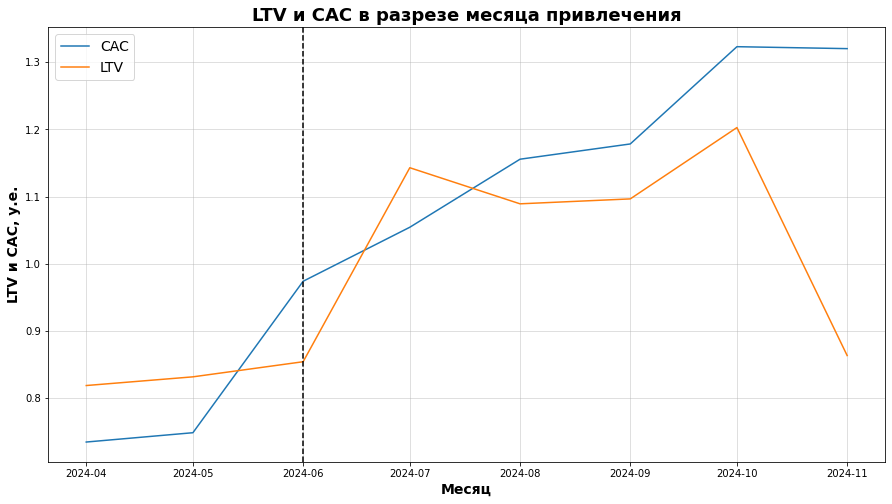

In [34]:
# Задаем размеры графика
plt.subplots(figsize=(15, 8))

# Визуализируем CAC и LTV на одном графике
for col in ['CAC', 'LTV']:
    plt.plot(df_metrics['first_month'], df_metrics[col], label=col)
# Выделяем на графике начало летнего периода, когда ввели новый контент
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('LTV и CAC в разрезе месяца привлечения', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('LTV и CAC, у.е.', fontsize=14, fontdict={'fontweight':'bold'})
plt.legend(fontsize=14)
plt.grid(alpha=0.5)
plt.show()

**Динамика CAC и LTV:**
- Наблюдается устойчивый рост CAC на протяжении всего периода - с 0,73 до 1,32 у.е. Причем с июня рост САС более стремительный, что совпадает с запуском нового контента и изменением маркетинговой кампании. После октября CAC стабилизировался на высоком уровне.
- LTV демонстрирует нестабильную динамику: с апреля по июнь показатель держался на уровне 0,82-0,85 у.е. В июле произошел резкий скачок LTV до 1,1-1,2 у.е., что может быть связано с положительным влиянием нового спортивного контента. С июля по октябрь наблюдалась стагнация LTV на достигнутом уровне, несмотря на растущие затраты на привлечение.
- Падение LTV в ноябре до 0,86 у.е. можно считать нерелевантным из-за неполного 28-дневного периода "жизни" пользователя.

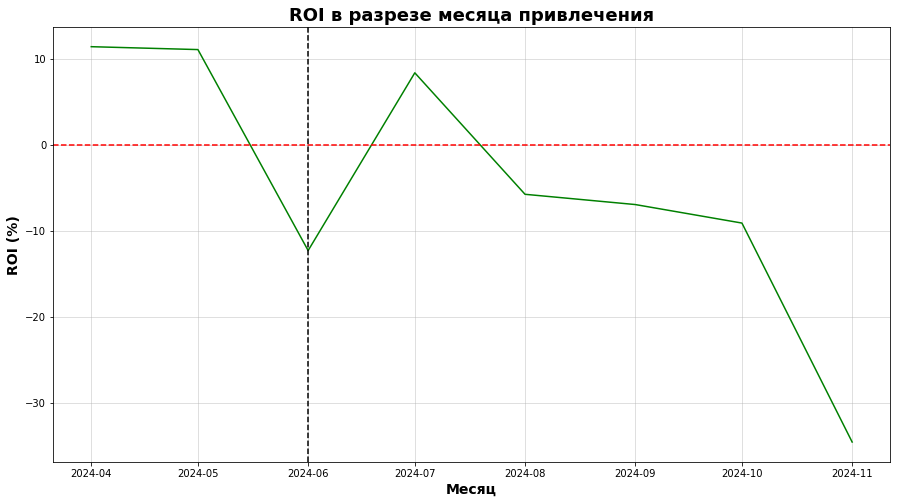

In [35]:
# Задаем размеры графика
plt.subplots(figsize=(15, 8))

# Визуализируем ROI    
plt.plot(df_metrics['first_month'], df_metrics['ROI'], color='green')
# Выделяем на графике июнь 
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Покажем линию при y=0, отражаюущую границу окупаемости
plt.axhline(0, linestyle='--', color='red')

# Задаем дополнительные настройки по отображению графика
plt.title('ROI в разрезе месяца привлечения', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('ROI (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.show()

**Эффективность вложенных средств ROI:**
- Июльская когорта показала положительный ROI 8,4%, подтверждая временную эффективность изменений. Однако начиная с июня ROI последовательно снижался, достигнув отрицательных значений от -5,7% до -9,0% для когорт после августа. Это обусловлено стагнацией LTV с июля по октябрь и постоянным стремительным увеличением CAC.
- Расчет ноябрьского показателя ROI (-34,6%) можно считать нерелевантным из-за из-за упомянутых ограничений по "жизни" пользователя.

### 📌 Промежуточные выводы:
- ✅ Внедрение нового спортивного контента положительно повлияло на вовлеченность - метрики DAU, MAU и Stickiness демонстрируют устойчивый рост.
- ✅ LTV значительно вырос в июле и стабилизировался на более высоком уровне, что подтверждает ценность нового контента для пользователей.
- ⚠️ Стремительный рост CAC после июня свел на нет положительный эффект от увеличения LTV.
- ⚠️ ROI когорт, пришедших после августа, стабильно отрицательный, что указывает на фундаментальные проблемы с окупаемостью.

**Рекомендация для дальнейшего анализа:** необходимо детально изучить эффективность отдельных источников привлечения, чтобы идентифицировать проблемные каналы и перераспределить маркетинговый бюджет.

## Сравнительный анализ эффективности каналов привлечения
В данном разделе проведем детальную диагностику эффективности отдельных рекламных каналов, чтобы определить:
- Какие источники привлечения демонстрируют окупаемость.
- Какие каналы не достигают точки безубыточности за 28-дневный период.
- Где сосредоточены основные проблемы, вызывающие стагнацию выручки.

### Анализ популярности и вовлеченности по источникам

Рассчитаем общее количество привлеченных пользователей DAU, MAU и Stickiness Ratio для каждого канала и, далее, проведем сравнительный анализ.

In [36]:
# Считаем общее число привлечённых пользователей для каждого источника
top_channels=df_visits.groupby('first_channel')['user_id'].nunique().reset_index().sort_values('user_id')
top_channels['freq_users']=top_channels['user_id']/top_channels['user_id'].sum() * 100
top_channels

,first_channel,user_id,freq_users
1,MediaTornado,14080,18.809447
2,RocketSuperAds,14257,19.045901
3,TipTop,18118,24.203805
0,FaceBoom,28401,37.940846


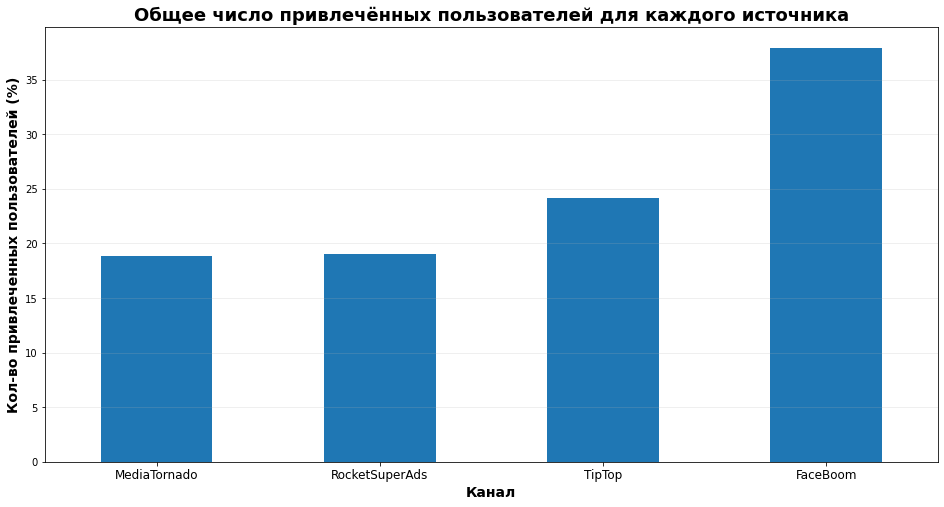

In [37]:
# Настраиваем размер графика
plt.rcParams['figure.figsize'] = (16, 8)
# Строим график 
top_channels.plot(kind='bar', y='freq_users', x='first_channel', legend=False)

# Задаем дополнительные настройки по отображению графика
plt.title('Общее число привлечённых пользователей для каждого источника', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Канал', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Кол-во привлеченных пользователей (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', alpha=0.25)
plt.show()

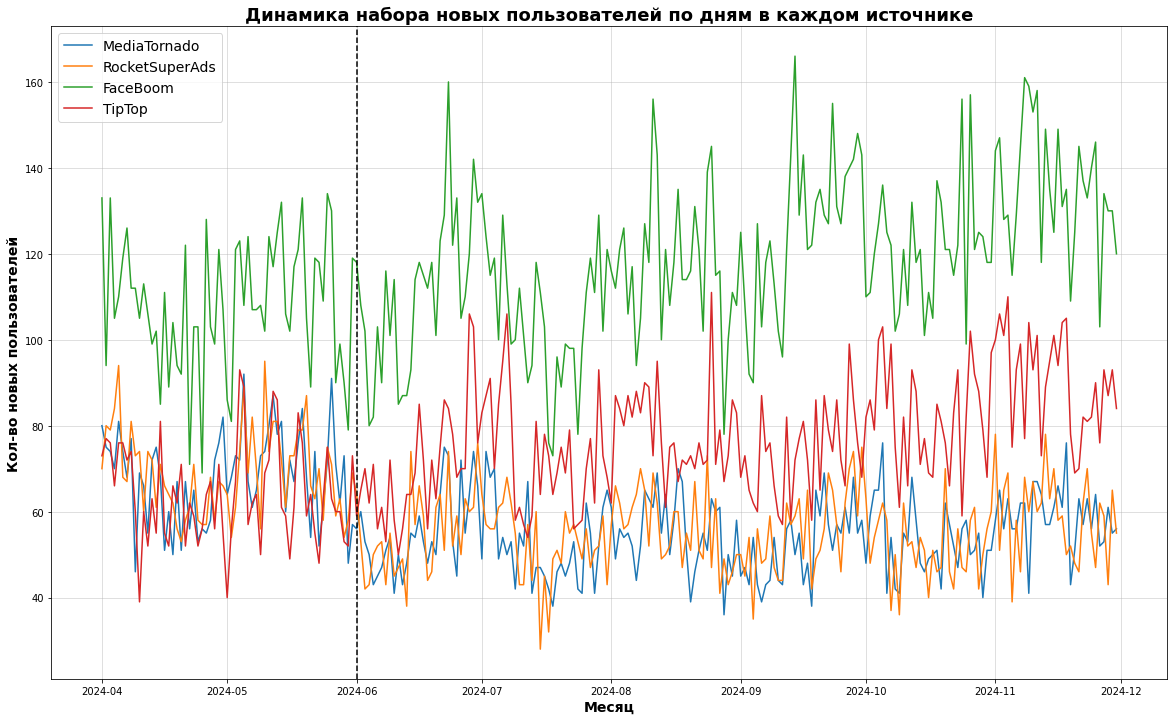

In [38]:
# Посчитаем количество привлеченных клиентов за каждый день в разрезе источника
channel_users=df_visits.groupby(['first_channel', 'first_dt'])['user_id'].nunique().reset_index()
# Настраиваем размер графика
plt.subplots(figsize=(20,12))
# Строим график 
for channel in df_visits['first_channel'].unique():
    plt.plot(channel_users[channel_users['first_channel']==channel]['first_dt'],
            channel_users[channel_users['first_channel']==channel]['user_id'],
             label=channel
            )
# Выделяем на графике июнь
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Динамика набора новых пользователей по дням в каждом источнике', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Кол-во новых пользователей', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ динамики привлечения пользователей по каналам**:
- **FaceBoom** - абсолютный лидер по привлечению новых пользователей с долей **38.0%** (28.4 тыс. пользователей). Канал демонстрирует устойчивое лидерство на протяжении всего периода, показывая **стабильно положительную динамику** прироста новых пользователей.
- **TipTop** занимает второе место с **24.2%** (18.1 тыс. пользователей). Канал показал значительную трансформацию: до летнего периода канал находился на одном уровне с MediaTornado и RocketSuperAds, а после лета закрепился на втором месте по объему привлечения, уступая только FaceBoom
- **MediaTornado** и **RocketSuperAds** демонстрируют схожую динамику, поддерживая примерно одинаковый уровень привлечения. Однако после летнего периода оба канала показывают слабую отрицательную динамику. За все время каналы привлекли **18.8% и 19.0%** пользователей соответственно.

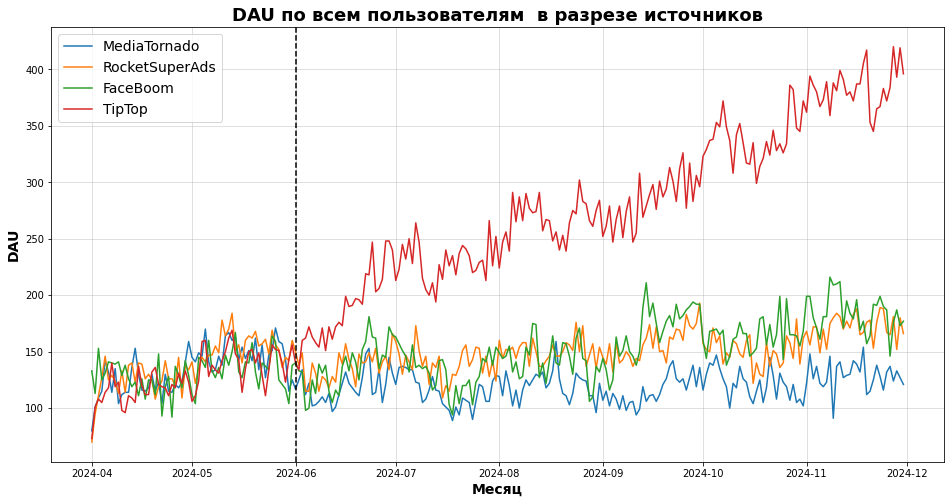

In [39]:
# Задаем размер графика
plt.figure(figsize=(16,8))
# Строим график 
for channel in df_visits['first_channel'].unique():
    channel_dau=df_visits[df_visits['first_channel']==channel].groupby('session_start')['user_id'].nunique().reset_index(name='DAU')
    plt.plot(channel_dau['session_start'], channel_dau['DAU'], label=channel)

# Выделяем на графике июнь
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('DAU по всем пользователям  в разрезе источников', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('DAU', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ динамики DAU по рекламным каналам:**
- **Канал TipTop** продемонстрировал наиболее значительный рост - после летнего периода его DAU **вырос в 3 раза**, в среднем увеличившись со 125 до 375 пользователей. Это свидетельствует о высокой вовлеченности пользователей, пришедших через данный канал.
- **FaceBoom и RocketSuperAds** показали стабильную положительную динамику с увеличением DAU **до 1,5 раз** в летний период. Таким образом, рост можно считать постепенным и устойчивым.
- **MediaTornado** сохранял постоянный уровень DAU на протяжении всего анализируемого периода в диапазоне **100-150 пользователей.** Отсутствие выраженной динамики может указывать как на стабильность канала, так и на ограниченный потенциал роста.

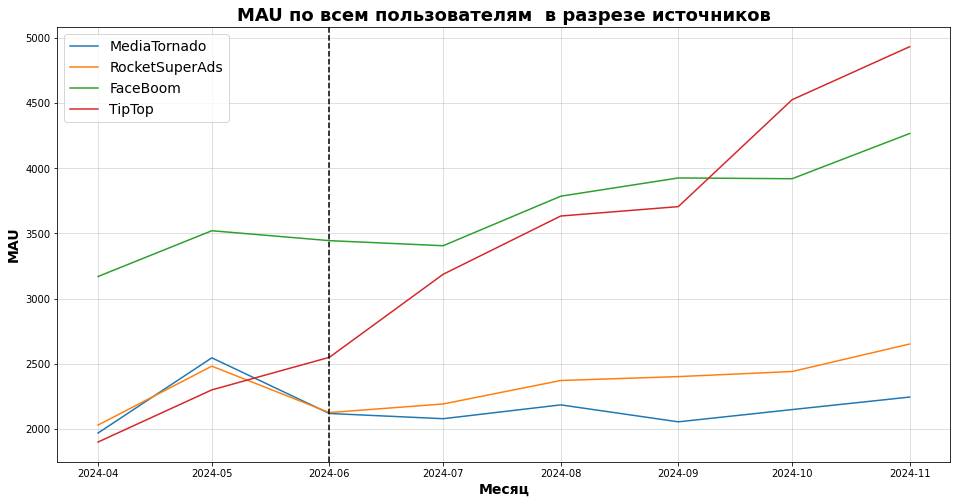

In [40]:
# Задаем размер графика
plt.figure(figsize=(16,8))
# Строим график 
for channel in df_visits['first_channel'].unique():
    channel_mau=df_visits[df_visits['first_channel']==channel].groupby('month')['user_id'].nunique().reset_index(name='MAU')
    plt.plot(channel_mau['month'], channel_mau['MAU'], label=channel)

# Выделяем на графике июнь   
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('MAU по всем пользователям  в разрезе источников', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('MAU', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ динамики MAU по рекламным каналам:**
- **TipTop** продемонстрировал наиболее впечатляющий рост - его MAU **увеличился в 2,6 раза** с 1,9 тыс. до 4,9 тыс. пользователей. Канал стал абсолютным лидером по MAU после октября, сменив FaceBoom на этой позиции. Особенно стремительный рост наблюдался с летнего периода, что свидетельствует об эффективности летней маректинговой камапании.
- **FaceBoom** сохранял лидерские позиции по MAU до сентября включительно. Канал демонстрировал устойчивую положительную динамику MAU - рост с 3,2 тыс. до 4,3 тыс. пользователей.
- **RocketSuperAds** показал плавный рост MAU после летнего периода с 2,1 тыс. до 2,6 тыс. пользователей.
- **MediaTornado** демонстрирует самый низкий показатель MAU среди всех каналов. После летнего периода значение стагнирует на уровне 2,1-2,2 тыс. пользователей.

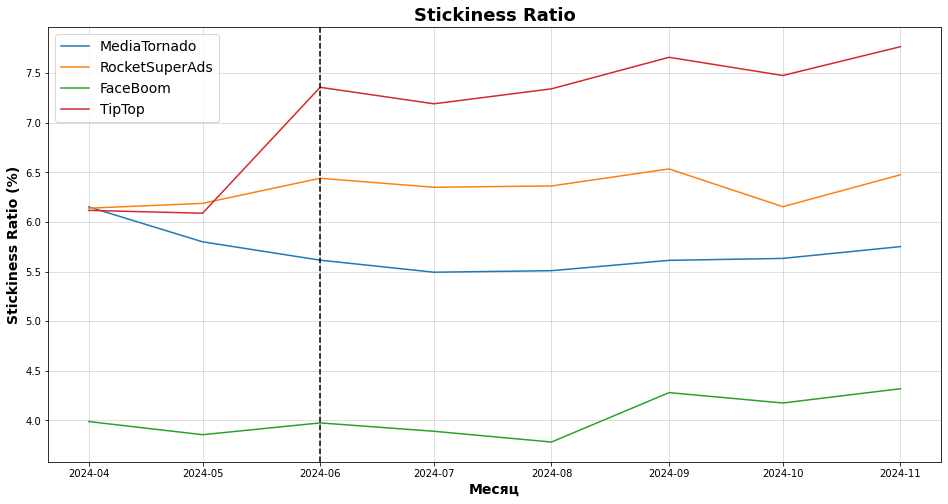

In [41]:
# Задаем размер графика
plt.figure(figsize=(16,8))
# Строим график 
for channel in df_visits['first_channel'].unique():
    channel_dau=df_visits[df_visits['first_channel']==channel].groupby('session_start')['user_id'].nunique().reset_index(name='DAU')
    channel_dau['month']=channel_dau['session_start'].dt.to_period('M').dt.to_timestamp()
    channel_dau_avg=channel_dau.groupby('month')['DAU'].mean().reset_index(name='DAU_avg')
    channel_mau=df_visits[df_visits['first_channel']==channel].groupby('month')['user_id'].nunique().reset_index(name='MAU')
    channel_stickiness=channel_dau_avg.merge(channel_mau, how='left', on='month')
    channel_stickiness['stickiness']=channel_stickiness['DAU_avg']/channel_stickiness['MAU']*100
    plt.plot(channel_stickiness['month'], channel_stickiness['stickiness'], label=channel)

# Выделяем на графике июнь   
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Stickiness Ratio', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Месяц', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Stickiness Ratio (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ Stickiness Ratio по рекламным каналам:**

- **TipTop** демонстрирует **наивысший показатель вовлеченности** - коэффициент вырос с 6.1% летом до 7.3% и продолжает плавный рост до 7,7%
- **FaceBoom**, несмотря на лидерство по привлечению новых пользователей и MAU, показывает **крайне низкую вовлеченность** (3,9-4,3%). Это указывает на проблему удержания пользователей из данного канала - они массово регистрируются, но редко возвращаются в приложение.
- **RocketSuperAds** стабильно сохраняет высокий уровень липкости в диапазоне 6.1-6.5%, подтверждая качество привлекаемой аудитории.
- Уровень липкости у канала **MediaTornado** до летнего периода снизился с 6.15 до 5.6%, а затем стабилизировался на уровне 5.5-5.7%.

### Анализ экономической эффективности по источникам

В рамках данного раздела проведем детальную оценку эффективности каждого канала в разрезе недельных когорт, где особое внимание уделим удержанию пользователей и ключевым финансовым показателям — конверсии в покупку, динамике CAC, LTV и ROI. Это позволит выявить не только общую эффективность каналов, но и их устойчивость с точки зрения окупаемости инвестиций.

Считаем скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).

In [42]:
# Делаем датасет по недельным когортам из датасета profiles
week_coh_profiles=profiles
week_coh_profiles['first_week']=week_coh_profiles['first_dt'].dt.to_period('W').dt.to_timestamp()
# Считаем количество пользователей в каждой недельной когорте
week_coh_profiles=week_coh_profiles.groupby(['first_channel', 'first_week'])['user_id'].nunique().reset_index(name='count_users')

# Делаем датасет по недельным когортам из датасета df_visits с лайфтаймом с 14-го по 28-й день
week_coh_visits=df_visits[(df_visits['lifetime_session']>=13) & (df_visits['lifetime_session']<28)]
week_coh_visits['first_week']=week_coh_visits['first_dt'].dt.to_period('W').dt.to_timestamp()
# Считаем количество пользователей в каждой недельной когорте
week_coh_visits=week_coh_visits.groupby(['first_channel', 'first_week'])['user_id'].nunique().reset_index(name='count_retained_users')

# Делаем итоговый датасет для расчета скользящего retention
week_retantion=week_coh_profiles.merge(week_coh_visits, how='left', on=['first_channel', 'first_week'])
week_retantion['retention']=week_retantion['count_retained_users'] / week_retantion['count_users'] * 100
# Выводим результат
week_retantion.tail()

,first_channel,first_week,count_users,count_retained_users,retention
135,TipTop,2024-10-28,639,181.0,28.325509
136,TipTop,2024-11-04,651,171.0,26.267281
137,TipTop,2024-11-11,657,83.0,12.633181
138,TipTop,2024-11-18,567,NaN,NaN
139,TipTop,2024-11-25,523,NaN,NaN


Ноябрьские когорты не успевают "прожить" лайфтайм в 28 дней. Поэтому во избежание искажения результатов ноябрьские когорты исключим из рассмотрения скользящего удержания.

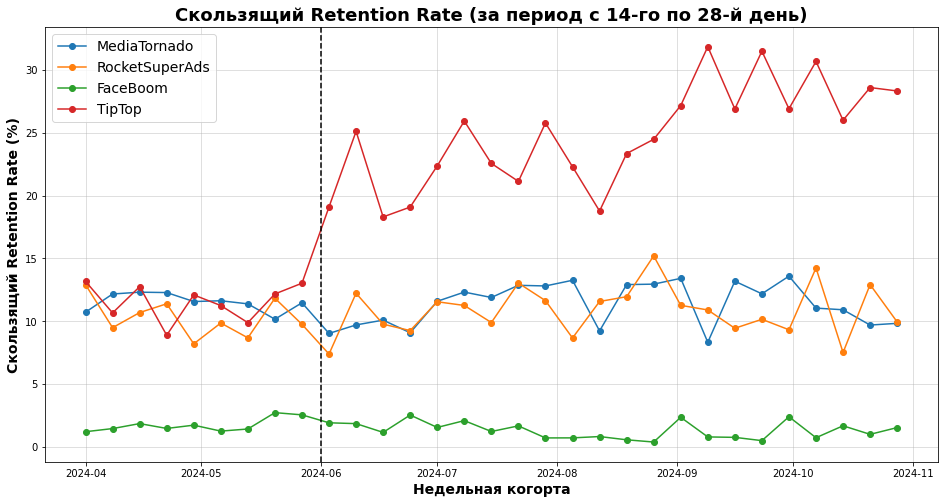

In [43]:
# Задаем размер графика
plt.subplots(figsize=(16,8))

# Делаем график для каждого источника привлечения
for channel in df_visits['first_channel'].unique():
    plot_week_retantion=week_retantion[(week_retantion['first_channel']==channel) & (week_retantion['first_week']<'2024-11-01')]
    plt.plot(plot_week_retantion['first_week'], plot_week_retantion['retention'], label=channel, marker='o')

# Выделяем на графике июнь   
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Скользящий Retention Rate (за период с 14-го по 28-й день)', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Недельная когорта', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Скользящий Retention Rate (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ скользящего Retention Rate (за период с 14-го по 28-й день):**
- Канал **TipTop демонстрирует значительный рост удержания** после внедрения нового контента - значение **увеличилось с 12% в весенний период до 28% осенью**, что свидетельствует о высоком качестве пользовательского опыта и эффективности нового контента для этой аудитории.
- У канала **FaceBoom удержание стагнирует на критически низком уровне 1,4%**, что полностью коррелирует с ранее обнаруженными низкими показателями Stickiness Ratio. Это подтверждает гипотезу о том, что несмотря на лидерство по объемам привлечения, данный канал не обеспечивает качественное удержание пользователей.
- Каналы **RocketSuperAds** и **MediaTornado** показывают нестабильную динамику удержания в диапазоне 8-14% без выраженной тенденции к росту или снижению.

Далее, считаем конверсию в покупку.

In [44]:
# Делаем датасет по недельным когортам из датасета df_orders с лайфтаймом до 28-го дня
week_coh_orders=df_orders[(df_orders['lifetime_purchase']<28)]
week_coh_orders['first_week']=week_coh_orders['first_dt'].dt.to_period('W').dt.to_timestamp()
# Считаем количество пользователей в каждой недельной когорте
week_conversion=week_coh_orders.groupby(['first_channel', 'first_week'])['user_id'].nunique().reset_index(name='count_purchase_users')

# Делаем итоговый датасет для расчета конверсии в покупку
week_conversion=week_coh_profiles.merge(week_conversion, how='left', on=['first_channel', 'first_week'])
week_conversion['conversion']=week_conversion['count_purchase_users']/week_conversion['count_users']*100
# Выводим результат
week_conversion.head()

,first_channel,first_week,count_users,count_purchase_users,conversion
0,FaceBoom,2024-04-01,820,93,11.341463
1,FaceBoom,2024-04-08,749,78,10.413885
2,FaceBoom,2024-04-15,697,88,12.625538
3,FaceBoom,2024-04-22,676,73,10.798817
4,FaceBoom,2024-04-29,747,89,11.914324


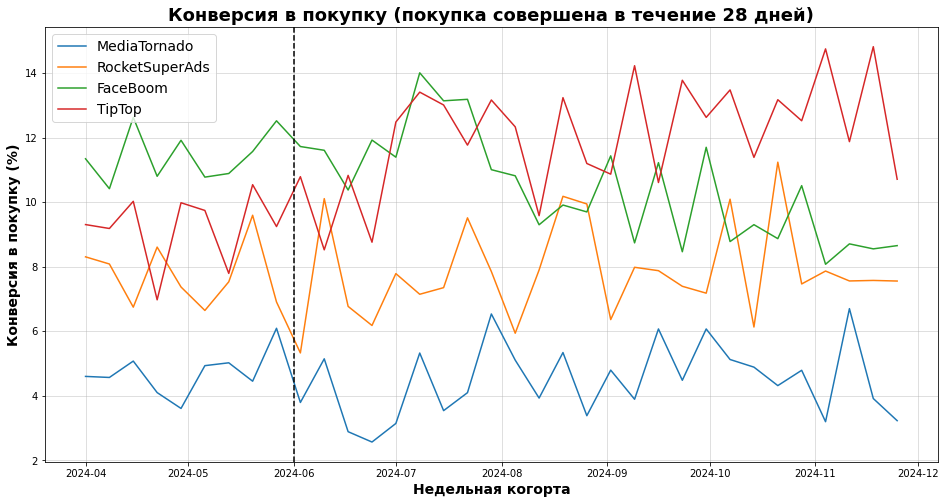

In [45]:
# Задаем размер графика
plt.subplots(figsize=(16,8))

# Делаем график для каждого источника привлечения
for channel in df_visits['first_channel'].unique():
    plot_week_conversion=week_conversion[week_conversion['first_channel']==channel]
    plt.plot(plot_week_conversion['first_week'], plot_week_conversion['conversion'], label=channel)

# Выделяем на графике июнь   
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Конверсия в покупку (покупка совершена в течение 28 дней)', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Недельная когорта', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Конверсия в покупку (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ конверсии в покупку по каналам привлечения:**

- У канала **TipTop** после летнего периода конверсия стабильно выросла с 9% до 12%, что дополнительно подтверждает эффективность контента для аудитории, пришедшей из данного канала.
- Несмотря на критически низкие показатели удержания, канал **FaceBoom** демонстрирует относительно высокую конверсию на уровне 9-11%. Однако после внедрения нового контента наблюдается негативная тенденция - конверсия скачкообразно снизилась с 11% до 9%. Это указывает на значительный нереализованный потенциал для роста, поскольку улучшение удержания могло бы многократно увеличить общую выручку с этого канала.
- Каналы **RocketSuperAds** и **MediaTornado** показывают стабильные, но умеренные результаты конверсии. RocketSuperAds держится на уровне 7-9%, в то время как MediaTornado демонстрирует более скромные 4-6% с заметным провалом до 3% в июне.

Посмотрим недельную динамику затрат на маркетинг по каждому источнику привлечения.

In [46]:
# Делаем датасет с разбиением по неделям из датасета ppro_costs
week_costs=ppro_costs
week_costs['week']=week_costs['dt'].dt.to_period('W').dt.to_timestamp()
# Считаем суммарные затраты на маркетинг в разрезе источника и недели
week_costs=week_costs.groupby(['channel', 'week'])['costs'].sum().reset_index()
# выводим результат
week_costs.head()

,channel,week,costs
0,FaceBoom,2024-04-01,769.875901
1,FaceBoom,2024-04-08,698.872741
2,FaceBoom,2024-04-15,652.241193
3,FaceBoom,2024-04-22,635.784171
4,FaceBoom,2024-04-29,702.833939


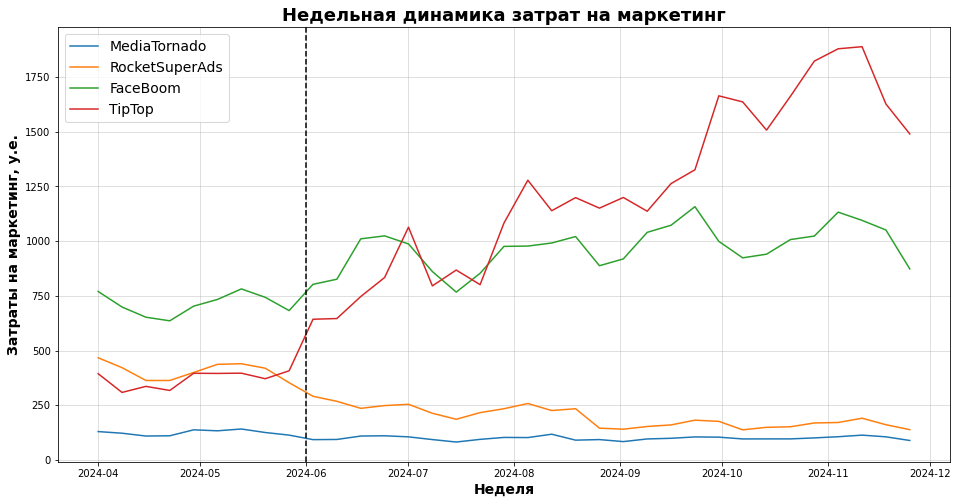

In [47]:
# Задаем размер графика
plt.subplots(figsize=(16,8))

# Делаем график для каждого источника привлечения
for channel in df_visits['first_channel'].unique():
    plot_week_costs=week_costs[week_costs['channel']==channel]
    plt.plot(plot_week_costs['week'], plot_week_costs['costs'], label=channel)

# Выделяем на графике июнь   
plt.axvline(pd.Timestamp('2024-06-01'), color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('Недельная динамика затрат на маркетинг', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Неделя', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('Затраты на маркетинг, у.е.', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ динамики маркетинговых затрат по источникам привлечения:**

- Наиболее значительный рост произошел в канале **TipTop**, где затраты ступенчато возросли с 300 до 1800 у.е., что кратно превышает инвестиции в другие каналы.
- **FaceBoom** демонстрирует плавный рост затрат с 650 до 1100 у.е., сохраняя статус второго по объему инвестиций канала. 
- **RocketSuperAds** показывает последовательное снижение маркетинговых расходов с 460 до 140 у.е. 
- **MediaTornado** сохраняет стабильно низкий уровень затрат на уровне 105 у.е.

Считаем САС по неделям.

In [48]:
# Создаем датасет week_CAC, который включает в себя датасет week_coh_profiles (кол-во пользователей по неделям) и week_costs (недельные затраты)
week_CAC=week_coh_profiles.merge(week_costs, how='left', left_on=['first_channel','first_week'], right_on=['channel','week'])
# Считаем САС
week_CAC['CAC']=week_CAC['costs']/week_CAC['count_users']
# Выводим результат
week_CAC.head()

,first_channel,first_week,count_users,channel,week,costs,CAC
0,FaceBoom,2024-04-01,820,FaceBoom,2024-04-01,769.875901,0.938873
1,FaceBoom,2024-04-08,749,FaceBoom,2024-04-08,698.872741,0.933074
2,FaceBoom,2024-04-15,697,FaceBoom,2024-04-15,652.241193,0.935784
3,FaceBoom,2024-04-22,676,FaceBoom,2024-04-22,635.784171,0.940509
4,FaceBoom,2024-04-29,747,FaceBoom,2024-04-29,702.833939,0.940875


Считаем LTV и ROI.

In [49]:
# В новый датасет week_LTV заносим значения недельной выручки
week_LTV=week_coh_orders.groupby(['first_channel', 'first_week'])['revenue'].sum().reset_index()
# Присоединяем датасет week_coh_profiles, чтобы учесть кол-во пользователей по неделям
week_LTV=week_LTV.merge(week_coh_profiles, how='left', on=['first_channel', 'first_week'])
# Считаем LTV
week_LTV['LTV']=week_LTV['revenue']/week_LTV['count_users']

# Создаем итоговый датасет week_metrics, присоединяя датасеты с LTV и САС
week_metrics=week_LTV[['first_channel', 'first_week', 'LTV']].merge(week_CAC[['first_channel', 'first_week', 'CAC']], how='left', on=['first_channel', 'first_week'])
# Считаем ROI
week_metrics['ROI']=(week_metrics['LTV']-week_metrics['CAC'])/week_metrics['CAC']*100
# Выводим результат
week_metrics.head()

,first_channel,first_week,LTV,CAC,ROI
0,FaceBoom,2024-04-01,0.463854,0.938873,-50.594635
1,FaceBoom,2024-04-08,0.450013,0.933074,-51.770905
2,FaceBoom,2024-04-15,0.538608,0.935784,-42.443071
3,FaceBoom,2024-04-22,0.463151,0.940509,-50.755301
4,FaceBoom,2024-04-29,0.408300,0.940875,-56.604258


Перед тем, как строить графики, посмотрим на лайфтайм пользователей. Нас интересует окупаемость за первые 28 дней. Значит, чтобы анализ метрик для юнит-экономики недельных когорт был равноценен, лайфтайм каждой когорты должен быть одинаковый и составлять 28 дней (в наших расчетах 27 дней, так как отсчет идет с 0 дня).

In [50]:
# Считаем максимальный лайфтайм всех когорт. Для удобства просмотра выведем только последние 10 когорт
week_coh_orders.groupby('first_week')['lifetime_purchase'].max().reset_index().tail(10)

,first_week,lifetime_purchase
25,2024-09-23,27
26,2024-09-30,27
27,2024-10-07,27
28,2024-10-14,27
29,2024-10-21,27
30,2024-10-28,27
31,2024-11-04,26
32,2024-11-11,19
33,2024-11-18,12
34,2024-11-25,5


Как видим, **ноябрьские когорты не успели "прожить" полный лайфтайм, который нам необходим для анализа окупаемости. Уберем эти когорты из рассмотрения.**

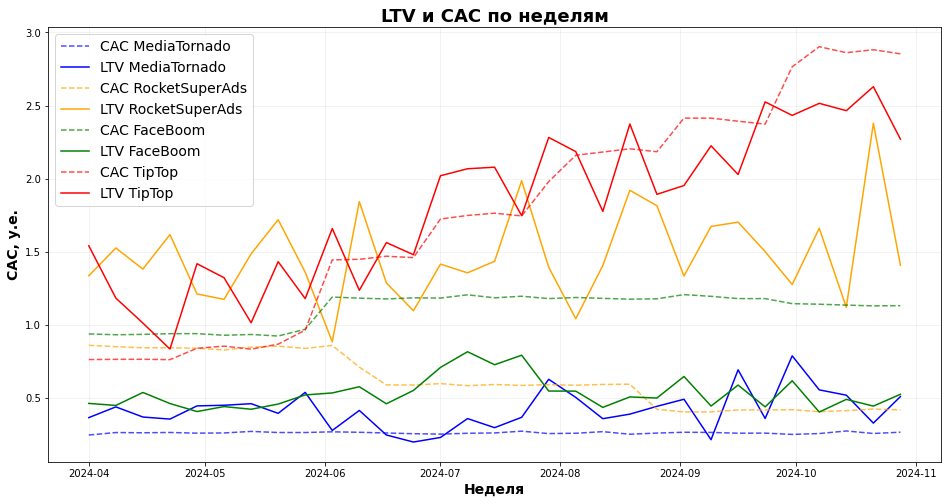

In [51]:
# Убираем ноябрьские когорты из рассмотрения (из-за неполного прожитого лайфтайма)
week_metrics_filt=week_metrics[week_metrics['first_week']<'2024-11-01']
# Задаем размер графика
plt.subplots(figsize=(16,8))

# Выбираем цвета для каждого источника
channel_colors={
    'MediaTornado':'blue',
    'RocketSuperAds':'orange',
    'FaceBoom':'green',
    'TipTop':'red'
}

# Делаем график для каждого источника привлечения
for channel, color in channel_colors.items():
    plot_week=week_metrics_filt[week_metrics_filt['first_channel']==channel]
    plt.plot(plot_week['first_week'], plot_week['CAC'], label=f'CAC {channel}', color=color, linestyle='--', alpha=0.7)
    plt.plot(plot_week['first_week'], plot_week['LTV'], label=f'LTV {channel}', color=color)

# Задаем дополнительные настройки по отображению графика
plt.title('LTV и CAC по неделям', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Неделя', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('САС, у.е.', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.show()

**Анализ соотношения LTV и CAC по рекламным каналам:**

- **TipTop**: после июня канал показывает скачкообразный рост LTV, который является наивысшим среди всех каналов, однако стремительный рост CAC полностью перекрывает это преимущество. Несмотря на максимальную пожизненную ценность пользователей, канал не достигает окупаемости из-за экстремально высоких затрат на привлечение.
- **RocketSuperAds** представляет собой противоположный случай - при умеренном, но стабильном LTV в диапазоне 1-2 у.е., канал демонстрирует последовательное снижение CAC с 0,9 до 0,4 у.е. Эта положительная динамика обеспечивает стабильное превышение LTV над стоимостью привлечения, делая канал экономически эффективным.
- **FaceBoom** является самым проблемным: при стабильно низком LTV на уровне 0,5 у.е. (за исключением временного скачка в июле) и постоянно растущем CAC, канал на всем периоде показывает отрицательную рентабельность.
- **MediaTornado** характеризуется самой низкой CAC (0,2 у.е.) при нестабильном LTV, не превышающем 0,7 у.е. За весь период анализа только четыре когорты не окупились.

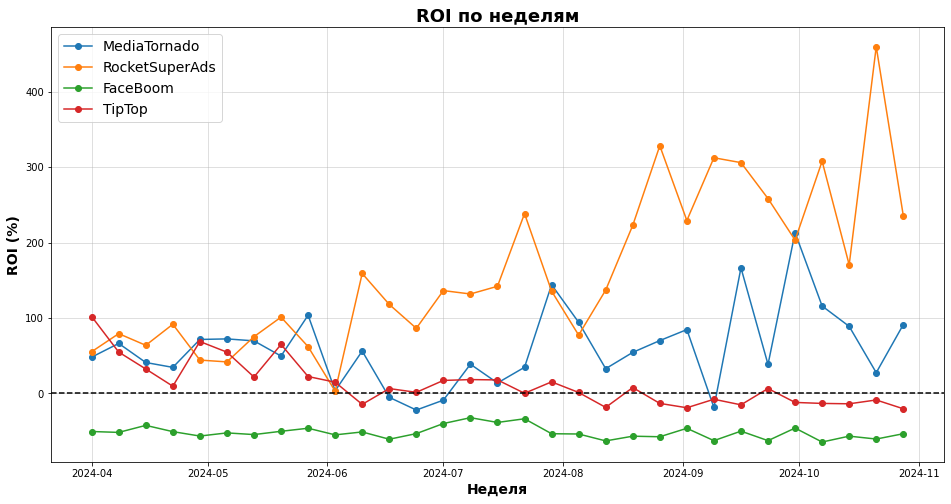

In [52]:
# Задаем размер графика
plt.subplots(figsize=(16,8))

# Делаем график для каждого источника привлечения
for channel in df_visits['first_channel'].unique():
    plot_week_ROI=week_metrics_filt[week_metrics_filt['first_channel']==channel]
    plt.plot(plot_week_ROI['first_week'], plot_week_ROI['ROI'], label=channel, marker='o')

# Выделяем на графике нулевую линию для наглядности окупаемости 
plt.axhline(0, color='black', linestyle='--')

# Задаем дополнительные настройки по отображению графика
plt.title('ROI по неделям', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Неделя', fontsize=14, fontdict={'fontweight':'bold'})
plt.ylabel('ROI (%)', fontsize=14, fontdict={'fontweight':'bold'})
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.show()

**Анализ динамики ROI по рекламным каналам:**
 
- **RocketSuperAds** продемонстрировал лучший результат - после внедрения нового контента ROI канала начал резко расти, достигнув к концу периода значений 200-300%. Это указывает на исключительную эффективность данного канала и высокую восприимчивость его аудитории к новому спортивному контенту.
- **MediaTornado** показал стабильность, но без значительного улучшения - ROI практически не изменился после обновления контента, оставаясь на уровне до 100% с отдельными пиковыми значениями. Это свидетельствует о нейтральном влиянии нововведений на монетизацию данной аудитории.
- **TipTop**: несмотря на первоначальный рост LTV, после внедрения нового контента ROI канала начал снижаться и в конечном итоге перестал окупаться. Это прямое следствие экстремального роста CAC, который нивелировал все преимущества увеличения LTV.
- Критическая ситуация сохраняется у **FaceBoom** - ROI канала постоянно держится на уровне -50%, что делает его абсолютно неокупаемым независимо от изменений в контенте или маркетинговой стратегии.

### 📌 Промежуточные выводы:

- **TipTop** является лидером по маркетинговым затратам. Хотя это и привело к значительному росту пользовательской базы, улучшению удержания и самой высокой конверсии, канал перестал окупаться после внедрения нового контента. Рост LTV не смог компенсировать экстремальное увеличение стоимости привлечения.
- **FaceBoom** занимает второе место по объему инвестиций, но демонстрирует наихудшие показатели окупаемости. Пользователи этого канала проявляют характеристики "однодневок" - низкое удержание при относительно высокой конверсии, что указывает на возможное несоответствие аудитории канала тематике контента.
- **MediaTornado**, несмотря на минимальный бюджет, демонстрирует стабильную окупаемость благодаря высокой вовлеченности пользователей. Новый контент не оказал значительного влияния на поведение этой аудитории.
- **RocketSuperAds показал выдающийся результат** - сокращение маркетинговых затрат при одновременном росте ROI до 300% после внедрения нового контента. Это свидетельствует о высокой лояльности и качественном составе аудитории данного канала.

**Таким образом, наиболее эффективными оказались два самых низкобюджетных канала - RocketSuperAds и MediaTornado. Это указывает на их серьезный недооцененный потенциал и необходимость перераспределения бюджета в их пользу.**

## Анализ долгосрочной окупаемости проблемных каналов

Для каналов TipTop и FaceBoom, которые не достигают окупаемости к 28-му дню, проведем углубленный анализ, рассчитав значения ROI за расширенный период (10 недель) и визуализируем результаты в виде тепловой карты с разбивкой по недельным когортам.

In [53]:
# создаем новый датасет из df_orders
week_orders=df_orders
# переводим дату привлечения в неделю
week_orders['first_week']=pd.to_datetime(week_orders['first_dt']).dt.to_period('W').dt.to_timestamp()
# переводим дату покупки в неделю
week_orders['purchase_week']=week_orders['event_dt'].dt.to_period('W').dt.to_timestamp()
# считаем количество недель между датой покупки и датой привлечения
week_orders['N_weeks']=week_orders['purchase_week'].dt.week-week_orders['first_week'].dt.week
# выводим промежуточный результат
week_orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime_purchase,first_month,first_week,purchase_week,N_weeks
0,771951256319,2024-04-01,2.99,2024-04-01,FaceBoom,0,2024-04-01,2024-04-01,2024-04-01,0
1,829942381059,2024-04-01,2.99,2024-04-01,FaceBoom,0,2024-04-01,2024-04-01,2024-04-01,0
2,727879856738,2024-04-01,14.99,2024-04-01,FaceBoom,0,2024-04-01,2024-04-01,2024-04-01,0
3,481270888930,2024-04-01,2.99,2024-04-01,TipTop,0,2024-04-01,2024-04-01,2024-04-01,0
4,844695029762,2024-04-01,2.99,2024-04-01,FaceBoom,0,2024-04-01,2024-04-01,2024-04-01,0


In [54]:
# посчитаем выручку в разрезе канала и даты привлечения за каждый недельный период от недели покупки
week_orders=week_orders.groupby(['first_channel', 'first_week', 'N_weeks'])['revenue'].sum().reset_index()
# выводим промежуточный результат
week_orders.head()

,first_channel,first_week,N_weeks,revenue
0,FaceBoom,2024-04-01,0,290.63
1,FaceBoom,2024-04-01,1,62.81
2,FaceBoom,2024-04-01,2,20.94
3,FaceBoom,2024-04-01,3,5.98
4,FaceBoom,2024-04-01,6,2.99


In [55]:
# создаем датасет week_orders_CAC, который в разрезе канала, первичной даты, недельного периода покажет выручку и САС
# для этого присоединяем таблицы week_orders (с выручкой) и week_CAC (с САС)
week_orders_CAC=week_orders.merge(week_CAC[['first_channel','first_week', 'CAC']], how='left', on=['first_channel','first_week'])

# присоединяем дополнительно датасет week_coh_profiles (кол-во пользователей)
week_orders_CAC_LTV=week_orders_CAC.merge(week_coh_profiles, how='left', on=['first_channel','first_week'])
# считаем кумулятивную выручку в разрезе канала и даты привлечения
week_orders_CAC_LTV['cum_revenue']=week_orders_CAC_LTV.groupby(['first_channel','first_week'])['revenue'].cumsum()
# считаем LTV
week_orders_CAC_LTV['LTV']=week_orders_CAC_LTV['cum_revenue']/week_orders_CAC_LTV['count_users']

# создаем итоговый датасет, где будут все метрики юнит-экономики
week_orders_CAC_LTV_ROI=week_orders_CAC_LTV
# считаем ROI
week_orders_CAC_LTV_ROI['ROI']=(week_orders_CAC_LTV_ROI['LTV']-week_orders_CAC_LTV_ROI['CAC'])/week_orders_CAC_LTV_ROI['CAC']
# выводим результат
week_orders_CAC_LTV_ROI.head()

,first_channel,first_week,N_weeks,revenue,CAC,count_users,cum_revenue,LTV,ROI
0,FaceBoom,2024-04-01,0,290.63,0.938873,820,290.63,0.354427,-0.622498
1,FaceBoom,2024-04-01,1,62.81,0.938873,820,353.44,0.431024,-0.540913
2,FaceBoom,2024-04-01,2,20.94,0.938873,820,374.38,0.456561,-0.513714
3,FaceBoom,2024-04-01,3,5.98,0.938873,820,380.36,0.463854,-0.505946
4,FaceBoom,2024-04-01,6,2.99,0.938873,820,383.35,0.467500,-0.502063


*Исследуем окупаемость канала FaceBoom:*

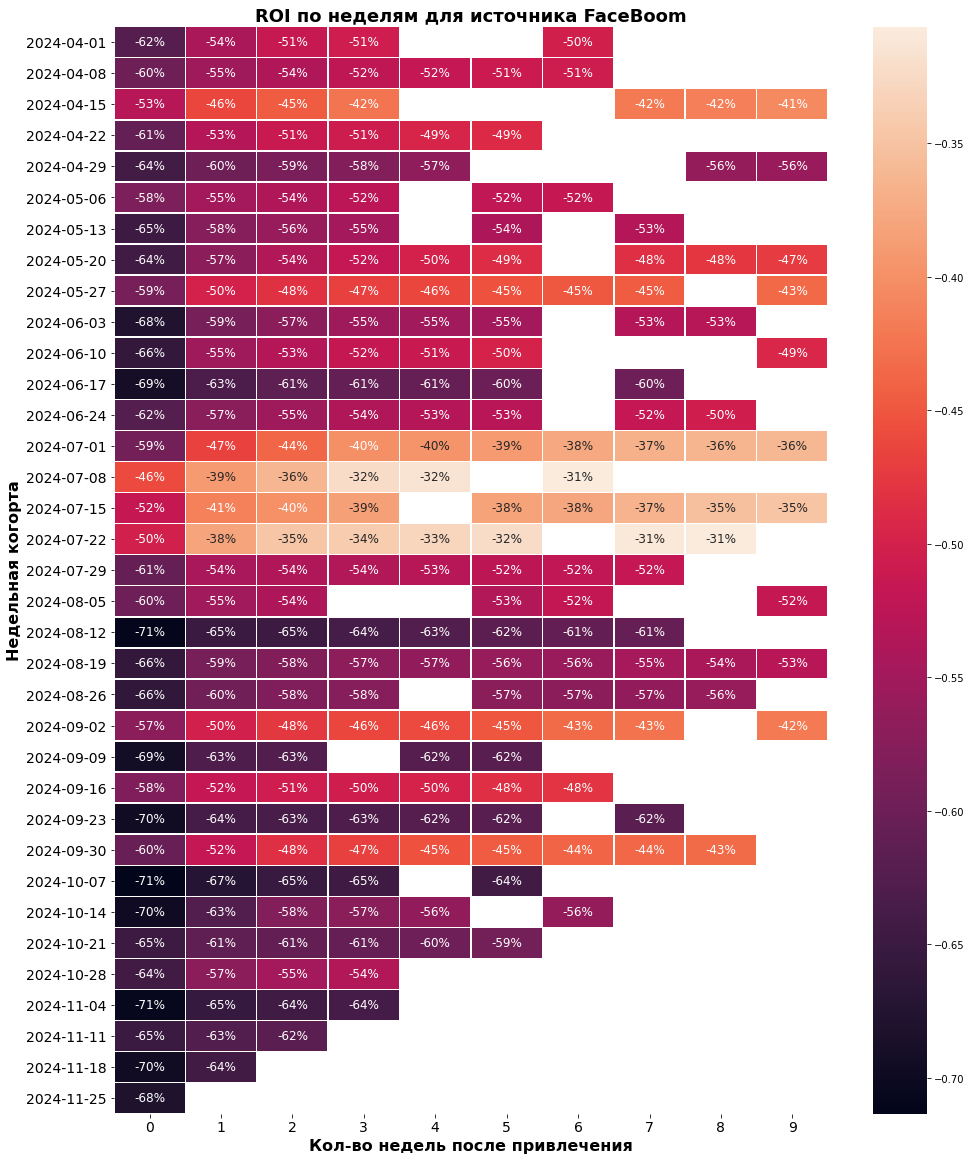

In [56]:
# Отфильтруем датасет по каналу FaceBoom и количеством недель менее 10 (по условию)
ROI_FaceBoom=week_orders_CAC_LTV_ROI[(week_orders_CAC_LTV_ROI['first_channel']=='FaceBoom') & (week_orders_CAC_LTV_ROI['N_weeks']<10)]
# для корректного отображения даты меняем формат столбца 'first_week' на дату
ROI_FaceBoom['first_week']=ROI_FaceBoom['first_week'].dt.date
# пивотируем данные, чтобы first_week стали индексами, а N_weeks — столбцами
ROI_FaceBoom_pivot=ROI_FaceBoom.pivot(index='first_week', columns='N_weeks', values='ROI')

# Строим тепловую карту 
plt.figure(figsize=(16, 20))
sns.heatmap(ROI_FaceBoom_pivot, 
            fmt='.0%',
            annot=True,
            linewidth=0.5,
            annot_kws={"size": 12})

# настраиваем отображение тепловой карты
plt.title('ROI по неделям для источника FaceBoom', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Кол-во недель после привлечения', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Недельная когорта', fontsize=16, fontdict={'fontweight':'bold'})
plt.tick_params(labelsize=14)
plt.show()

*Исследуем окупаемость канала TipTop:*

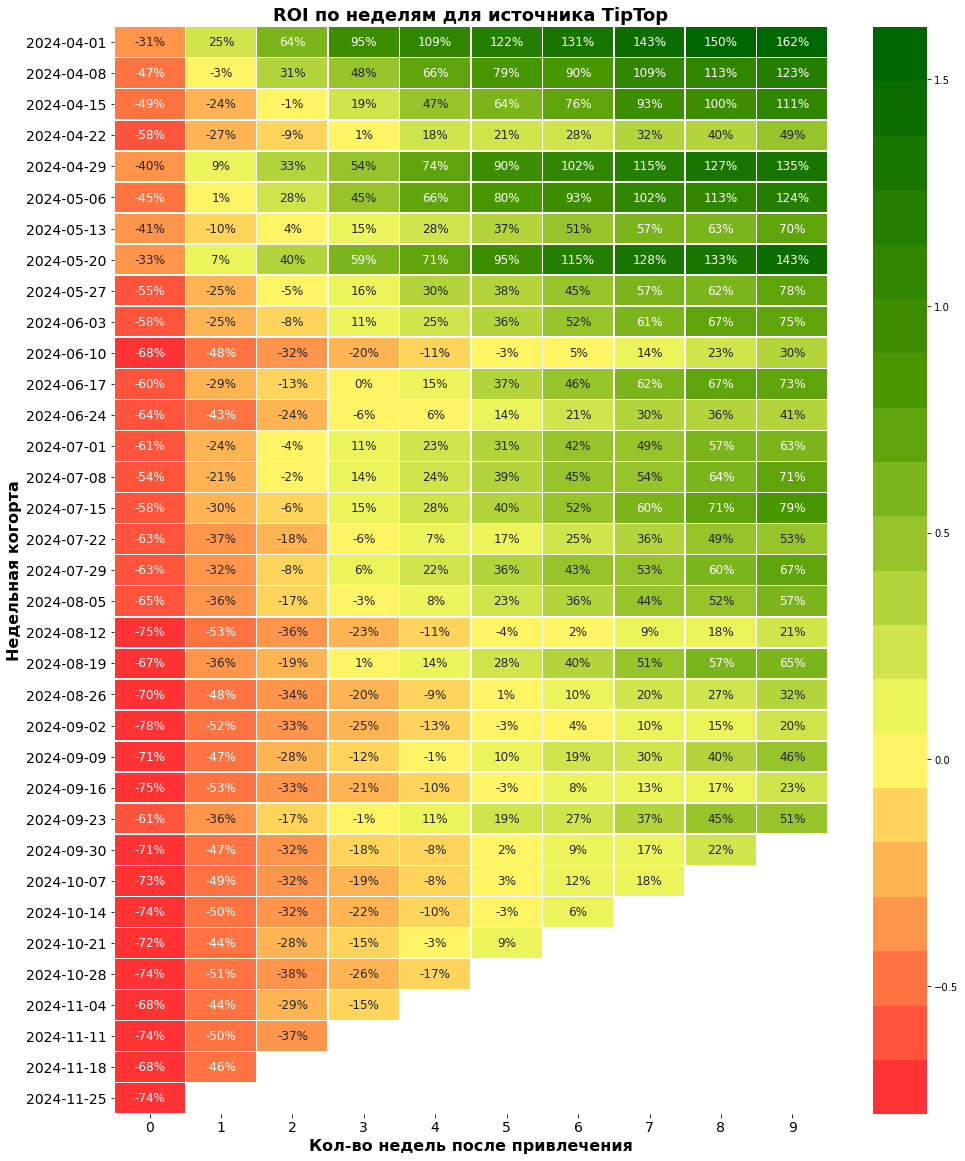

In [57]:
# Выбираем цвета для построения тепловой карты
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900', '#006600'], N=20)

# Отфильтруем датасет по каналу TipTop и количеством недель менее 10 (по условию)
ROI_TipTop=week_orders_CAC_LTV_ROI[(week_orders_CAC_LTV_ROI['first_channel']=='TipTop') & (week_orders_CAC_LTV_ROI['N_weeks']<=9)]
# для корректного отображения даты меняем формат столбца 'first_week' на дату
ROI_TipTop['first_week']=ROI_TipTop['first_week'].dt.date
# пивотируем данные, чтобы first_week стали индексами, а N_weeks — столбцами
ROI_TipTop_pivot=ROI_TipTop.pivot(index='first_week', columns='N_weeks', values='ROI')

# Строим тепловую карту 
plt.figure(figsize=(16, 20))
sns.heatmap(ROI_TipTop_pivot, 
            cmap=cmap,
            fmt='.0%',
            annot=True,
            linewidth=0.5,
            annot_kws={"size": 12})

# настраиваем отображение тепловой карты
plt.title('ROI по неделям для источника TipTop', fontsize=18, fontdict={'fontweight':'bold'})
plt.xlabel('Кол-во недель после привлечения', fontsize=16, fontdict={'fontweight':'bold'})
plt.ylabel('Недельная когорта', fontsize=16, fontdict={'fontweight':'bold'})
plt.tick_params(labelsize=14)
plt.show()

### 📌 Промежуточные выводы:

- **Канал FaceBoom:** ни одна из когорт не выходит на окупаемость даже за 10-недельный период. ROI стабильно сохраняется в глубоко отрицательной зоне (-40% до -60%). Отсутствуют признаки улучшения монетизации с течением времени.
- **Канал TipTop:** если до внедрения нового контента инвестиции возвращались за 1-2 недели, то после внедрения срок окупаемости увеличился до 4-5 недель в летний период и достиг 5-6 недель осенью. Несмотря на заметный долгосрочный потенциал, проявляющийся ко второму месяцу жизни пользователей, прогрессирующий рост периода возврата вложений с каждой новой когортой указывает на необходимость срочных мер по оптимизации стоимости привлечения пользователей для восстановления рентабельности канала.

## 📝 Выводы и рекомендации

**Характеристика каналов привлечения:**
1. ⚠️ **TipTop - Перспективный, но проблемный:**
    - **Сильные стороны**: Лидер по вовлеченности (Stickiness 7.7%), высокая конверсия (12%), лучшие показатели удержания (28%).
    - **Слабые стороны**: Экстремально высокий CAC, период окупаемости увеличился с 1-2 до 5-6 недель.
    - **Проблема**: Рост затрат на привлечение перекрывает преимущества высокого LTV.
    
    
2. ❌ **FaceBoom - Критически неэффективный:**
    - **Сильные стороны**: Максимальный охват (37.9% пользователей), относительно высокая конверсия (9%).
    - **Слабые стороны**: Катастрофически низкое удержание (1.4%), отрицательный ROI (-50%), не окупается в долгосрочной перспективе.
    - **Проблема**: Пользователи-"однодневки", не заинтересованные в продукте.


3. 🥇 **RocketSuperAds - Лучшие показатели:**
    - **Сильные стороны**: Максимальный ROI (300%), стабильно высокое удержание (6.1-6.5%).
    - **Слабые стороны**: Умеренные объемы привлечения.


4.  ⚖️ **MediaTornado - Стабильные показатели:**
    - **Сильные стороны**: Низкий CAC, стабильная окупаемость.
    - **Слабые стороны**: Ограниченный рост, нейтральная реакция на новый контент.

**Таким образом, суммарный эффект от дисбаланса в распределении бюджета проявился в общей негативной динамике: низкая отдача от FaceBoom в сочетании с запредельными затратами на TipTop привели к тому, что с июня выручка приложения начала демонстрировать стагнацию. Это указывает на необходимость срочного пересмотра маркетинговой стратегии и перераспределения бюджета в пользу более экономически эффективных каналов.**

### 💡 Рекомендации:

- **Перераспределить маркетинговый бюджет в пользу рентабельных каналов RocketSuperAds и MediaTornado.** Причем основной упор рекомендуется сделать на RocketSuperAds, обладющим лучшими показателями юнит-экономики.
- **Оптимизировать бюджет TipTop с фокусом на снижение CAC.**
- Несмотря на критически низкую окупаемость, FaceBoom генерирует около 38% всего притока пользователей. Поэтому **для канала FaceBoom рекомендуется разработать специальную программу вовлечения более релевантной аудитории.** Также рекомендуется внедрить push-уведомления с персонализированным контентом для повышения удержания новых пользователей.